In [77]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score


from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [78]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


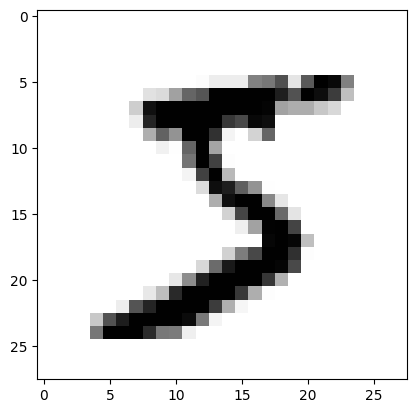

In [79]:
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [80]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [81]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [82]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

In [83]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [99]:
# Parameters to vary
hidden_layers = [2, 3]
neurons = [100, 150]
activations = ['tanh', 'sigmoid', 'relu']
optimizers = [SGD(), Adam()]

# Create 15 distinct models
models = []
for hl in hidden_layers:
    for n in neurons:
        for a in activations:
            model = Sequential()
            model.add(Dense(n, input_dim=784, activation=a))
            for i in range(hl-1):
                model.add(Dense(n, activation=a))
            model.add(Dense(10, activation='softmax'))
            models.append(model)

# Compile and fit models
for opt in optimizers:
    for model in models:
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        model.fit(x_train_norm, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4440 - accuracy: 0.8801
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2343 - accuracy: 0.9342
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1838 - accuracy: 0.9484
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.9563
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1305 - accuracy: 0.9629
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1138 - accuracy: 0.9677
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1002 - accuracy: 0.9717
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0892 - accuracy: 0.9755
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0801 - accuracy: 0.9783
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.072

In [91]:
# Evaluate models
accuracies = []
confusion_matrices = []
for model in models:
    y_pred = model.predict(x_test_norm)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)
    acc = accuracy_score(y_test_classes, y_pred_classes)
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    accuracies.append(acc)
    confusion_matrices.append(cm)

313/313 [==============================] - 1s 2ms/step


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 150)               117750    
                                                                 
 dense_115 (Dense)           (None, 150)               22650     
                                                                 
 dense_116 (Dense)           (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________
Best accuracy:  97.81



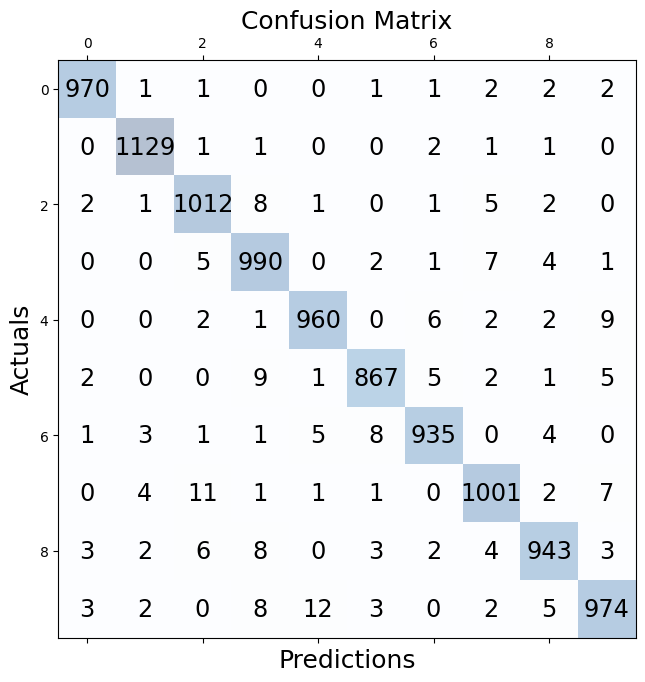

In [106]:
# Find best classifier
best_index = np.argmax(accuracies)
best_model = models[best_index]
best_accuracy = accuracies[best_index]
best_cm = confusion_matrices[best_index]

# Print results
best_model.summary()
print("Best accuracy: ", str(100 * best_accuracy))
print()
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_cm.shape[0]):
    for j in range(best_cm.shape[1]):
        ax.text(x=j, y=i,s=best_cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 100)               78500     
                                                                 
 dense_122 (Dense)           (None, 100)               10100     
                                                                 
 dense_123 (Dense)           (None, 100)               10100     
                                                                 
 dense_124 (Dense)           (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________
Worst accuracy:  96.67999999999999



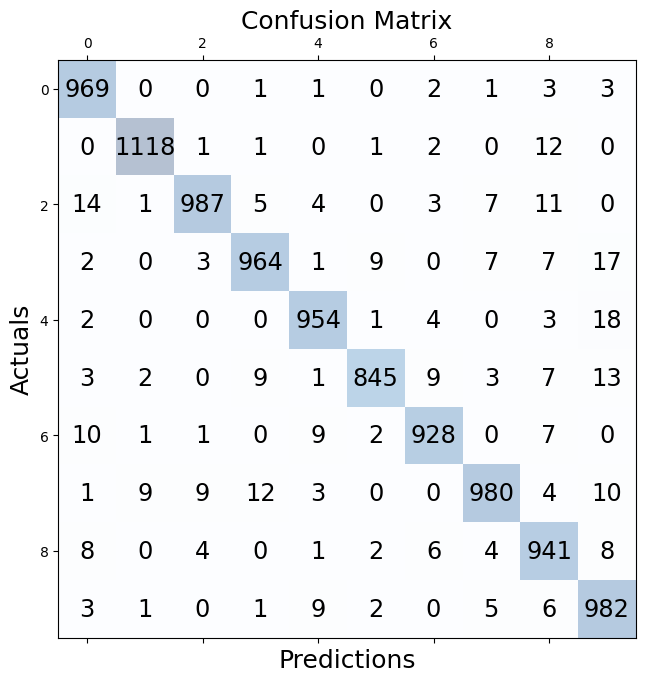

In [108]:
#Worst Model
worst_index = np.argmin(accuracies)
worst_model = models[worst_index]
worst_accuracy = accuracies[worst_index]
worst_cm = confusion_matrices[worst_index]

# Print results
worst_model.summary()
print("Worst accuracy: ", str(100 * worst_accuracy))
print()
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(worst_cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(worst_cm.shape[0]):
    for j in range(worst_cm.shape[1]):
        ax.text(x=j, y=i,s=worst_cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

313/313 [==============================] - 1s 3ms/step


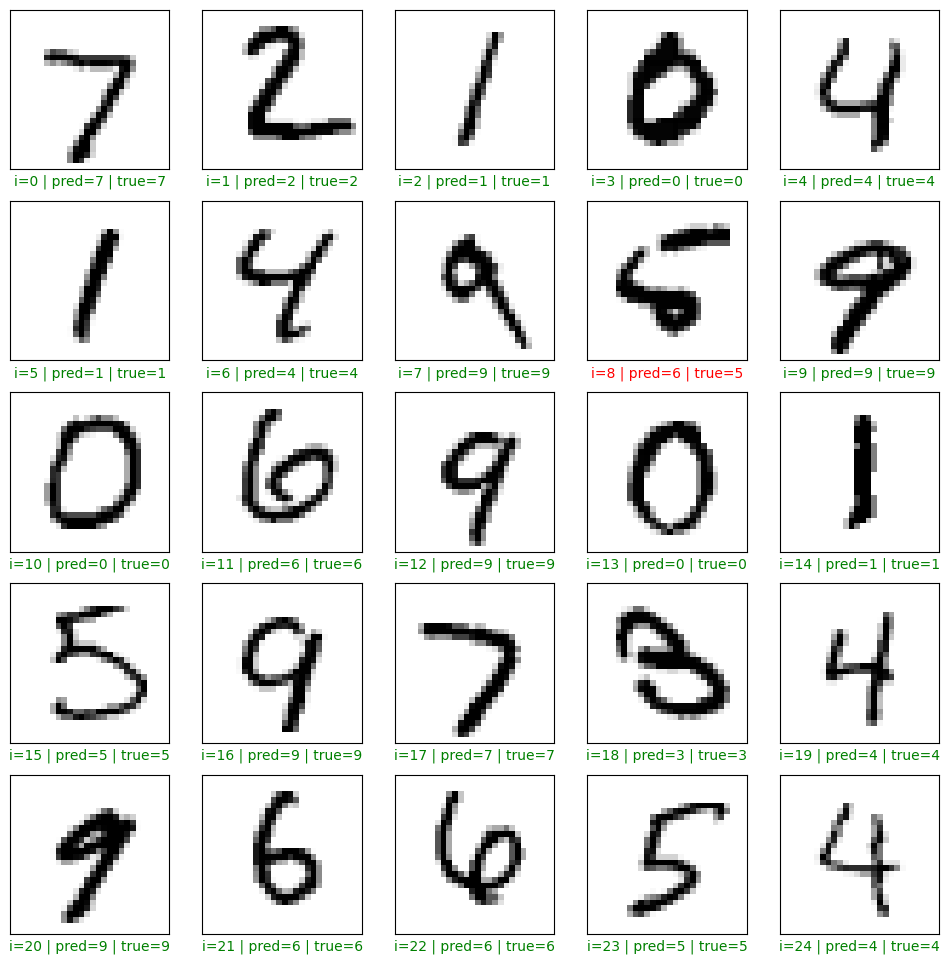

In [98]:
preds = best_model.predict(x_test_norm)
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()